# Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

In [1]:
#Чтение данных
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',') 
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')  

pd.options.display.max_colwidth = 150

# Часть 1. Приоритизация гипотез.

Задачи:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Описание данных

1 часть:
Hypothesis
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2 часть:
Orders
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Visitors
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [2]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
#приведем к нужному формату
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

## Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») 
Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи.

In [7]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).round(1)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


В качастве вывода можно сделать следующую приоретизацию гипотез:
- 8: Запустить акцию, дающую скидку на товар в день рождения
- 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

## Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [8]:
hypothesis['RICE'] = (hypothesis['Impact']*hypothesis['Confidence']*hypothesis['Reach'])/hypothesis['Efforts']

hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В качастве вывода можно сделать следующую приоретизацию гипотез:
- 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

## Выводы

- Используя фреймворк ICE, лидерами стали гипотезы 8,0,7;
- Используя фреймворк RICE, лидерами стали гипотезы 7,2,0,6;
- Как можно заметить, лидеры-гипотезы отличаются в двух фреймворках, это можно объяснить тем, что ICE НЕ учитывает охваты пользователей.

# Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. 
Задача: проанализировать тест. 

Перед построением графиков проверим данные на явные дубликаты:

In [9]:
orders.duplicated().sum()

0

In [10]:
visitors.duplicated().sum()

0

Явных дубликатов в данных не выявлено. 

In [11]:
#посчитаем количество пересекающихся пользователей 
duplicatedAB = orders.loc[orders['group'] == 'A', 'visitorId'].isin(orders.loc[orders['group'] == 'B', 'visitorId'])
print('Количество пересекающихся пользователей в двух группах:', duplicatedAB.sum())

Количество пересекающихся пользователей в двух группах: 89


Если пользователь совершал много покупок он мог попасть в обе группы. Можно таких пользователей удалить, но делать это не обязательно. Тогда из теста уйдут покупатели с большим числом покупок, а поиск аномальных покупателей по количеству покупок даст другие результаты.


In [12]:
#посчитаем пользователей в группах
countA = len(orders.loc[orders['group'] == 'A'])
countB = len(orders.loc[orders['group'] == 'B'])
print('Количество участников в группе А:', countA)
print('Количество участников в группе B:', countB)

Количество участников в группе А: 557
Количество участников в группе B: 640


Вывод:  
- В данных не было выявлено явных дубликатов. 
- Всего в тесте в группах А и В участвует 557 и 640 человек соответственно. 
- Получилось, что группы разные по размеру, можно объяснить это тем, что была проведена более эффективая работа с пользователями в группе В (возможно, причина в лучшей конверсии). Разница в данном случае не значительна.
- Пользователи пересекаются и некоторые попадают в две группы сразу. Было решено оставить таких пользователей для дальнейших корректных действий с данными. 


# 1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [13]:
#Cоздадим массив уникальных пар значений дат и групп теста
groups = orders[['date','group']].drop_duplicates()

#Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков
orders_agg = groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

orders_agg.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [14]:
#Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitors_agg = groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_agg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [15]:
#Объединим обе таблицы в одну с понятными названиями столбцов:
cumulative_data = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group']) 

cumulative_data.columns = ['date', 'group', 'num_orders', 'paying_visitors', 'revenue', 'num_visitors']
cumulative_data.head()

,date,group,num_orders,paying_visitors,revenue,num_visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [16]:
cumulativeRevenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'num_orders']]
cumulativeRevenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'num_orders']]

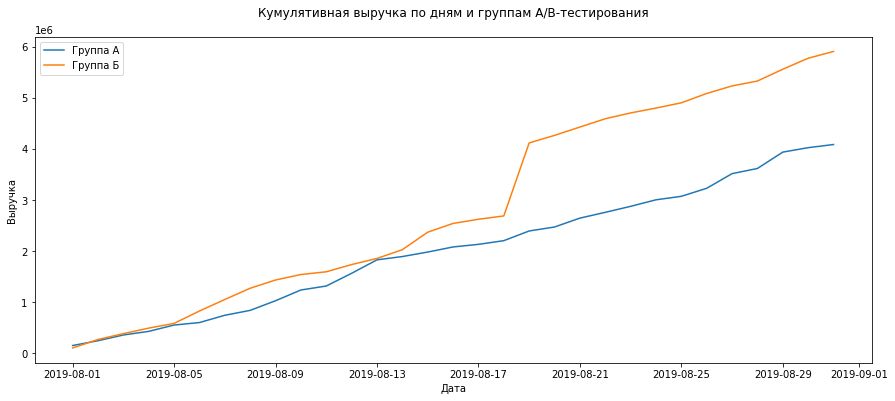

In [17]:
#Строим график
plt.figure(figsize=(15,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням и группам A/B-тестирования', pad=20)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(['Группа А', 'Группа Б'])
plt.show()

Выводы:
- Выручка равномерно увеличивается в течение всего теста в двух группах 
- График выручки В возрастает в середине (19.08.2019), это можно объяснить либо очень дорогостоящим, крупным заказом, либо резким увеличением количества заказов


# 2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

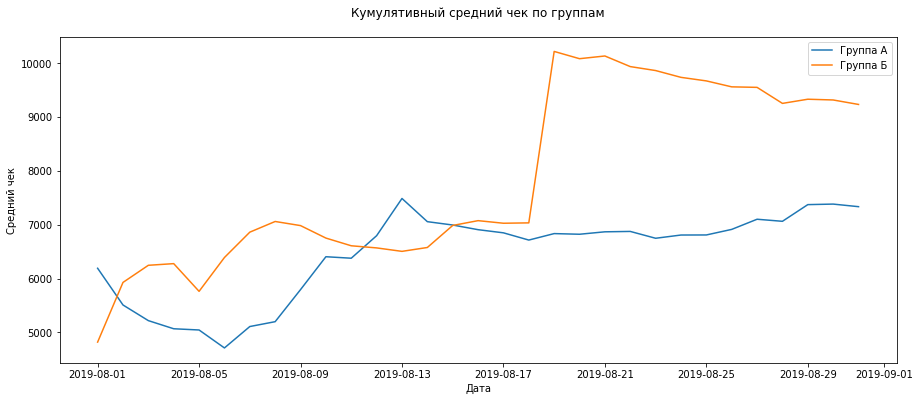

In [18]:
plt.figure(figsize=(15,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['num_orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['num_orders'], label='B')
plt.legend() 


plt.title('Кумулятивный средний чек по группам', pad=20)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend(['Группа А', 'Группа Б'])
plt.show()

Выводы:
- Оба графика содержат колебания в нескольких точках
- График группы А стабилизировался в середине
- Средний чек группы В еще не стабилизировался,на графике группы В заметен резкий всплекс (19.08.2019), это может быть связано с аномально дорогостоящим, крупным заказом 

# 3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

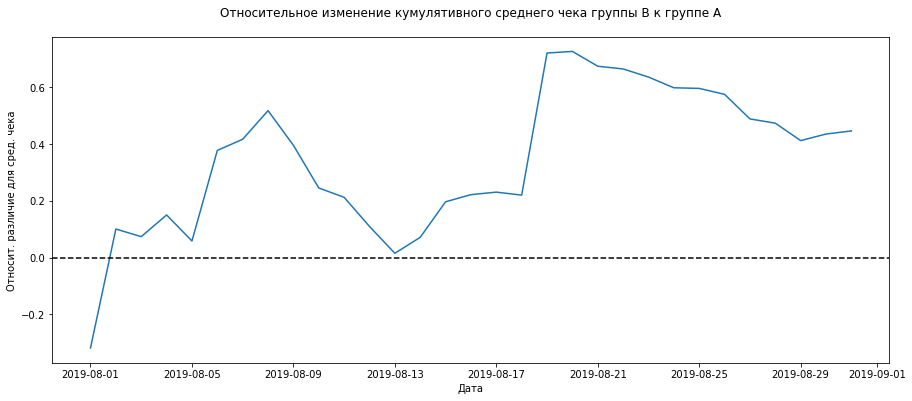

In [19]:
#объединим таблицы cumulativeRevenueA и cumulativeRevenueB
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['num_ordersA'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['num_ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А', pad=20)
plt.ylabel('Относит. различие для сред. чека')
plt.xlabel('Дата')
plt.show()

Выводы:
- В нескольких точках график различия между сегментами резко «скачет». Можно объяснить это крупными дорогостоящими заказами и выбросами. Найдём их позже.

# 4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [20]:
cumulative_data['conversion'] = cumulative_data['num_orders']/cumulative_data['num_visitors'] *100
# отделяем данные по группе A
cumulativeDataA = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulative_data[cumulative_data['group']=='B']


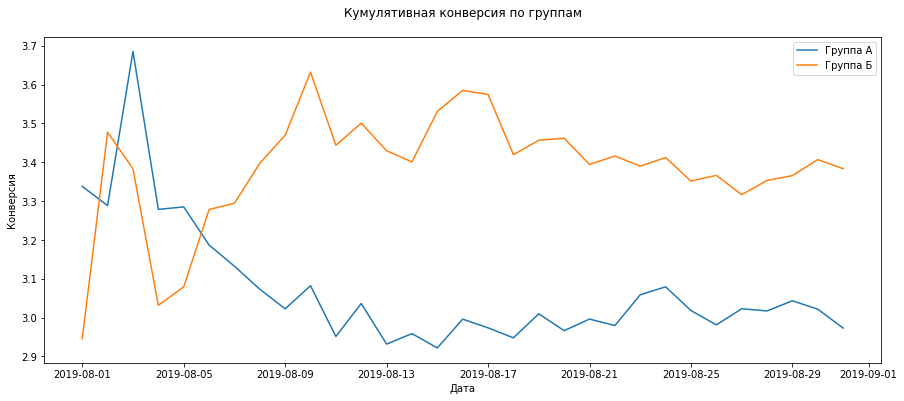

In [21]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам', pad=20)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend(['Группа А', 'Группа Б'])
plt.show()

Выводы:
- В начале графика, конверсия группы А превышает группу В, однако далее конверсия группы В выравнивается и превышает конверсию группы А

# 5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 


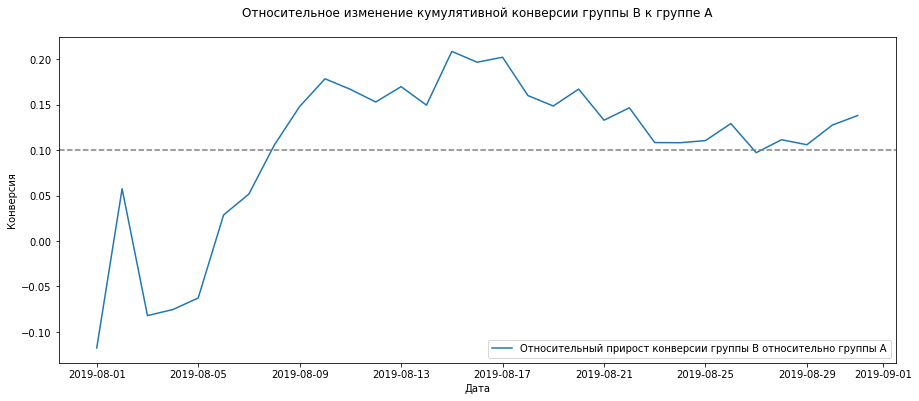

In [23]:
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А', pad=20)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axhline(y=0.10, color='grey', linestyle='--')
plt.legend()


Вывод:
- Практически на протяжении всего теста группа B выигрывает у группы A.
- Конверсия в группе B стабильно выше на 10% по истечении 1 недели.

# 6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [24]:
# Найдём число заказов по пользователям
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': 'nunique'})
ordersByUsers

,transactionId
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


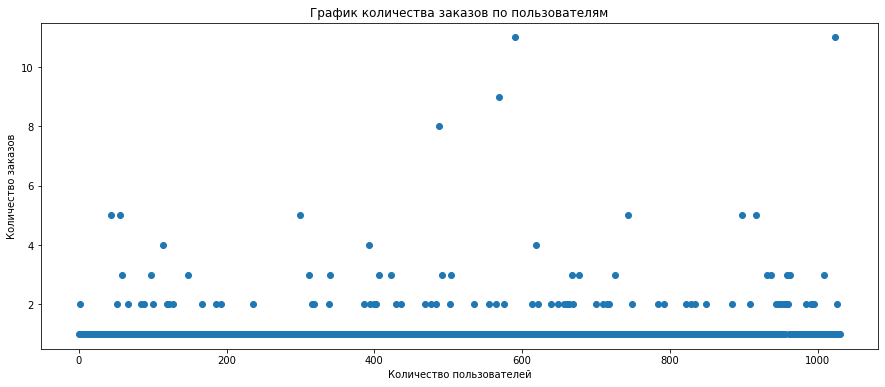

In [25]:
# Построим точечный график 
x_values = pd.Series(range(0,len(ordersByUsers.index)))
plt.figure(figsize=(15, 6))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Вывод:
- Основная масса пользователей совершила 1 заказ, гораздо меньше совершило 2 заказа. Небольшая доля пользователей сделали от 3 до 5 заказов. Также есть пользователи сделавшие 8,9 и даже 11 заказов, можно считать это выбосами.

# 7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [26]:
print('95-й перцентиль количества заказов на пользователя:',np.percentile(ordersByUsers['transactionId'], 95)) 
print('99-й перцентиль количества заказов на пользователя:',np.percentile(ordersByUsers['transactionId'], 99)) 

95-й перцентиль количества заказов на пользователя: 2.0
99-й перцентиль количества заказов на пользователя: 4.0


Вывод:
- Не более 5% пользователей совершили 2 заказа, не более 1% пользователей совершило 4 заказа. 
- Граница для определения аномальных пользователей -  на 1 пользвателя 3 заказа.

# 8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

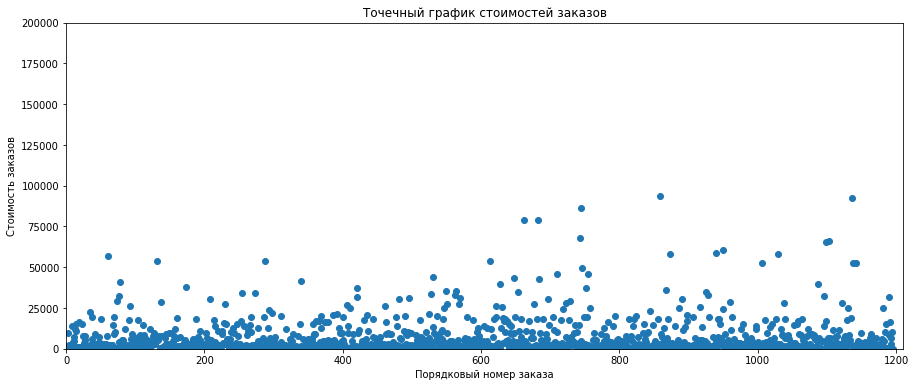

In [27]:
# Построение точечного графика 
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 6))
plt.axis([0, 1210, 0, 200000])
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказов')
plt.show()

Вывод:
- Большая часть заказов не превышает сумму в 20 тыс. руб.

# 9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
print('95-й перцентиль стоимости заказов:',(np.percentile(orders['revenue'], 95)).round(2))
print('99-й перцентиль стоимости заказов:',(np.percentile(orders['revenue'], 99)).round(2))

95-й перцентиль стоимости заказов: 28000.0
99-й перцентиль стоимости заказов: 58233.2


Вывод: 
- Сделано не более 5% заказов на сумму 28'000, а так же не более 1% заказов на сумму 58'233. 
- Границу для определения аномальной стоимости заказа примем за 95-й перцентиль, а именно за 28'000.

# 10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Для начала выведем нулевую и альтернативную гипотезы:
- H0: различий в конверсии между группами нет
- H1: различия в конверсии между группами есть 

Уровень значимости примем за 0.05

In [30]:
# Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# display(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное различие в среднем между группами = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.01679
Относительное различие в среднем между группами = 0.138


Вывод:
- p-value меньше 0.05, имеются основания отвергнуть нулевую гипотезу в пользу альтернативной. Следовательно, различия в конверсии между группами есть
- Прирост среднего группы В к конверсии группы А равен 13,8%. 

# 11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Для начала выведем нулевую и альтернативную гипотезы:
- H0: различий в среднем чеке между группами нет
- H1: различия в среднем чеке между группами есть 

Уровень значимости примем за 0.05

In [31]:
#считаем статистическую значимость 
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
0.259


Вывод: 
- p-value больше 0.05, недостаточно оснований, чтобы отвергнуть нулевую гипотезу в пользу альтернативной.Следовательно, различий в среднем чеке между группами нет. Это можно объяснить тем, что разница среднего чека в двух группах небольшая
- Относительный прирост среднего чека группы В к среднему чеку группы А равен 25,9%. 

# 12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64


In [33]:
# Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)
print('p-value','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.01794
0.148


Вывод:
- p-value меньше 0.05, можно отвергнуть теорию о том, что выборки равны. 
- Конверся в группе В в среднем отличается от конверсии в группе А на 14,8 процентов

# 13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [34]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.977
-0.017


Вывод:
- p-value больше 0.05, следовательно, можно сделать вывод, что различий между группами нет.
- По данным конверсии сделаем вывод, что различия между группами есть, а по среднему чеку - нет
- Относительный прирост среднего чека группы В к среднему чеку группы А меньше 0. Такое различие с сырыми данными может быть связано с выбросами. 

# 14 Примите решение по результатам теста и объясните его. 

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

# 15 Результирующий вывод:

1. Приоритизация гипотез
- Применяя фреймворк ICE, были выделены самые перспективные гипотезы - 8,0,7;
- Применяя фреймворк RICE, были выделены самые перспективные гипотезы - 7,2,0,6.

2. Анализ А/В теста
- Выручка почти равномерно увеличивается в течение всего теста;
- При постоении графика кумулятивной конверсии было заметно, что на протяжении почти всего теста группа В лидировала;
- Конверсия в группе B стабильно выше конверсии в группе A на 10% по просшествии 1 недели;
- Большинство пользователей делали 1-2 заказа. Также некоторая малая доля пользователей делали от 3 до 5 заказов. Однако есть пользователи совершившие 8,9 и даже 11 заказов, примем это число за выбросы;
- Большая часть заказов не превышает сумму в 20 тыс рублей;

По графикам:
- График различия конверсии между группами сообщает, что группа B лидирует относительно группы A; График различия среднего чека колеблется: благодаря этому были выведены аномалии. 
- График различия среднего чека неоднозначный, колеблется, исходя из представленных результатов, получилось выделить аномальные значения.

По гипотезам:
- Нет статистически значимого различия по среднему чеку в группах и в «сырых», и в отфильтрованных данных.
- Есть статистически значимое различие по средней конверсии в группах и в «сырых», и в отфильтрованных данных.

По выигрышной группе:

- По проводимому тесту и по объему данных, можно убедиться, что средний чек не меняется, а конверсия гораздо выше в группе В.
- Таким образом, с ростом конверсии будет расти и выручка, поэтому тест можно остановить и зафиксировать победу группы В.